# Classification 

In [3]:
import pandas as pd  
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.metrics import f1_score, recall_score,accuracy_score,precision_score,confusion_matrix 


In [4]:
df = sns.load_dataset('titanic')

In [5]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
X = df[['sex','age','sibsp','pclass','parch','fare']]
y = df['survived']

In [7]:
X = pd.get_dummies(X,columns=['sex'])

In [8]:
X.isnull().sum()

age           177
sibsp           0
pclass          0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [9]:
X.age.fillna(value=X['age'].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3464\1520641283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.age.fillna(value=X['age'].mean(),inplace=True)


In [10]:
X.isnull().sum()

age           0
sibsp         0
pclass        0
parch         0
fare          0
sex_female    0
sex_male      0
dtype: int64

In [11]:
# now train a model
x_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred = model.predict(X_test)

In [13]:
# accuracy 
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.7374301675977654


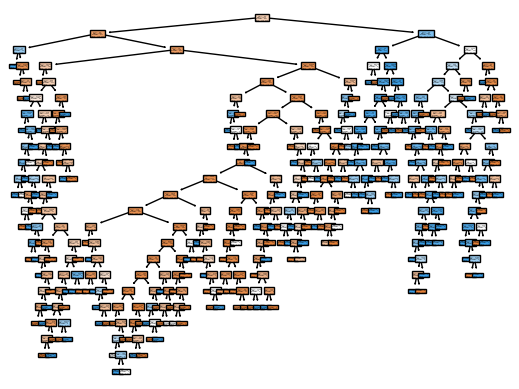

<Figure size 640x480 with 0 Axes>

In [14]:
# draw tree 
tree.plot_tree(model.fit(X,y),filled=True)
plt.show()
plt.savefig("practice.png")

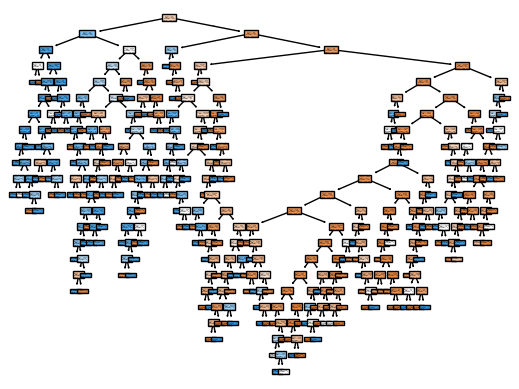

<Figure size 2000x1800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [15]:
# pdf 
tree.plot_tree(model.fit(X,y),filled=True)
plt.figure(figsize=(20,18))
plt.show()
plt.savefig("practice.pdf", format="pdf",dpi=300)

In [16]:
print("precision score:",precision_score(y_test,y_pred))

print("recall score:",recall_score(y_test,y_pred))

print("f1 score:",f1_score(y_test,y_pred))


precision score: 0.6323529411764706
recall score: 0.6615384615384615
f1 score: 0.6466165413533834


In [17]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[89, 25],
       [22, 43]])

Text(50.722222222222214, 0.5, 'predicted label')

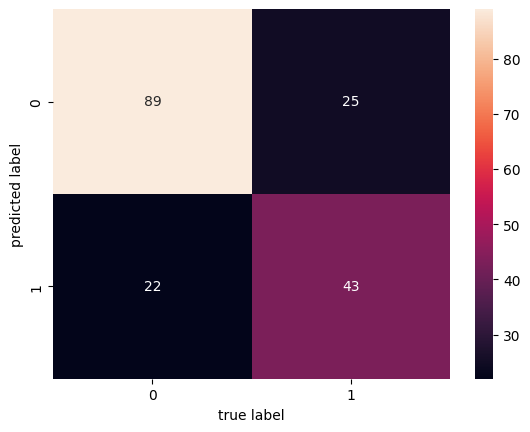

In [18]:
sns.heatmap(cm,annot=True)
plt.xlabel("true label")

plt.ylabel("predicted label")

# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train,y_train)
y_pred = model1.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

Text(50.722222222222214, 0.5, 'predicted label')

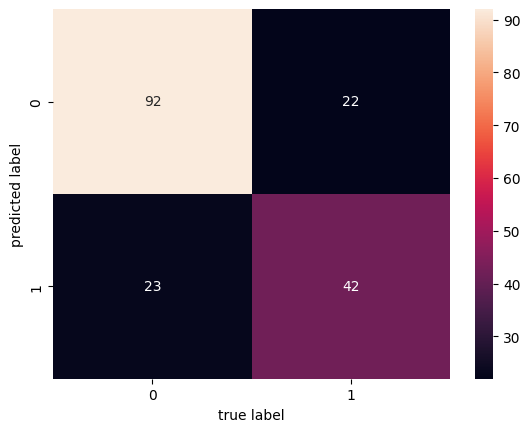

In [20]:
sns.heatmap(cm,annot=True)

plt.xlabel("true label")

plt.ylabel("predicted label")

In [21]:
print("precision score:",precision_score(y_test,y_pred))

print("recall score:",recall_score(y_test,y_pred))

print("f1 score:",f1_score(y_test,y_pred))

precision score: 0.65625
recall score: 0.6461538461538462
f1 score: 0.6511627906976745


# Random forest model  

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[95, 19],
       [17, 48]])

In [23]:
print("precision score:",precision_score(y_test,y_pred))

print("recall score:",recall_score(y_test,y_pred))

print("f1 score:",f1_score(y_test,y_pred))

precision score: 0.7164179104477612
recall score: 0.7384615384615385
f1 score: 0.7272727272727273


Text(50.722222222222214, 0.5, 'predicted label')

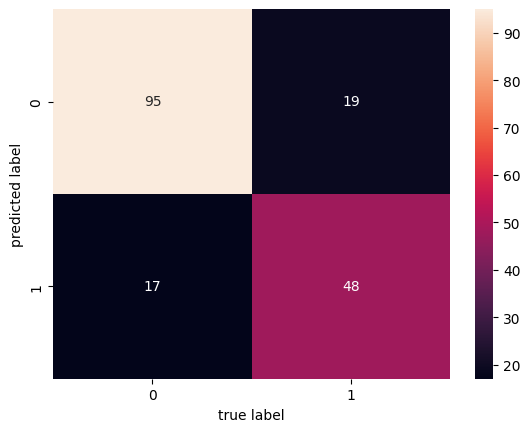

In [24]:
sns.heatmap(cm,annot=True)

plt.xlabel("true label")

plt.ylabel("predicted label")

# Logistic Regression 

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred,y_test)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.722222222222214, 0.5, 'predicted label')

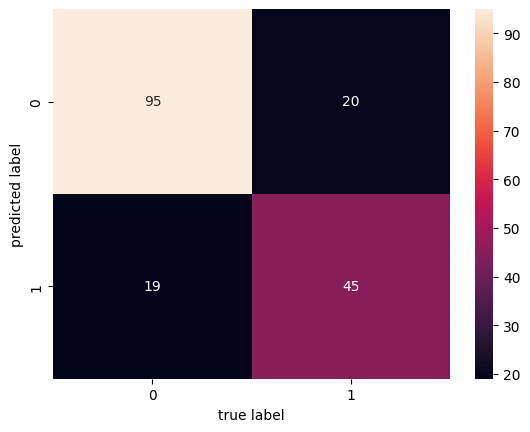

In [26]:
sns.heatmap(cm,annot=True)

plt.xlabel("true label")

plt.ylabel("predicted label")

In [27]:
print("precision score:",precision_score(y_test,y_pred))

print("recall score:",recall_score(y_test,y_pred))

print("f1 score:",f1_score(y_test,y_pred))

precision score: 0.703125
recall score: 0.6923076923076923
f1 score: 0.6976744186046512


# SVM

In [28]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred,y_test)

In [29]:
print("precision score:",precision_score(y_test,y_pred))

print("recall score:",recall_score(y_test,y_pred))

print("f1 score:",f1_score(y_test,y_pred))

precision score: 0.6666666666666666
recall score: 0.3076923076923077
f1 score: 0.42105263157894735


# Naive bayes 

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred,y_test)

In [31]:
print("precision score:",precision_score(y_test,y_pred))

print("recall score:",recall_score(y_test,y_pred))

print("f1 score:",f1_score(y_test,y_pred))

precision score: 0.7166666666666667
recall score: 0.6615384615384615
f1 score: 0.688
